# "FlashPost : To count message tokens to and from openAI LLM"
> "This post tells you different ways to count the tokens, both the input tokens sent to LLM and the tokens in output response"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Balaji
- categories: [fastpages, jupyter]

#### 1. Set env key for openai

In [2]:
from langchain_openai import ChatOpenAI

In [4]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key:  ········


#### 2. Use langchain
Lets use the langchain library to chat with LLM

In [27]:
llm = ChatOpenAI(model= "gpt-4o-mini", temperature=0)

In [77]:
aimessage = llm.invoke("how are you?")
aimessage

AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 11, 'total_tokens': 39, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-6694fe33-9aa9-4f0a-9cf8-4ee61eb7b754-0', usage_metadata={'input_tokens': 11, 'output_tokens': 28, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [79]:
messages = [{"role":"user","content":"how are you?"}]

The above response message says **'prompt_tokens': 11** and **output tokens as 28** 

 lets verify it

#### 3. Verify with tiktoken library

In [81]:
import tiktoken

In [80]:
encoding = tiktoken.encoding_for_model("gpt-4o-mini")

In [82]:
encoding.encode("how are you?")

[8923, 553, 481, 30]

Lets decode and verify the text

In [25]:
encoding.decode([8923, 553, 481, 30])

'how are you?'

we can also see how the tokens are split interactively by acccessing https://platform.openai.com/tokenizer

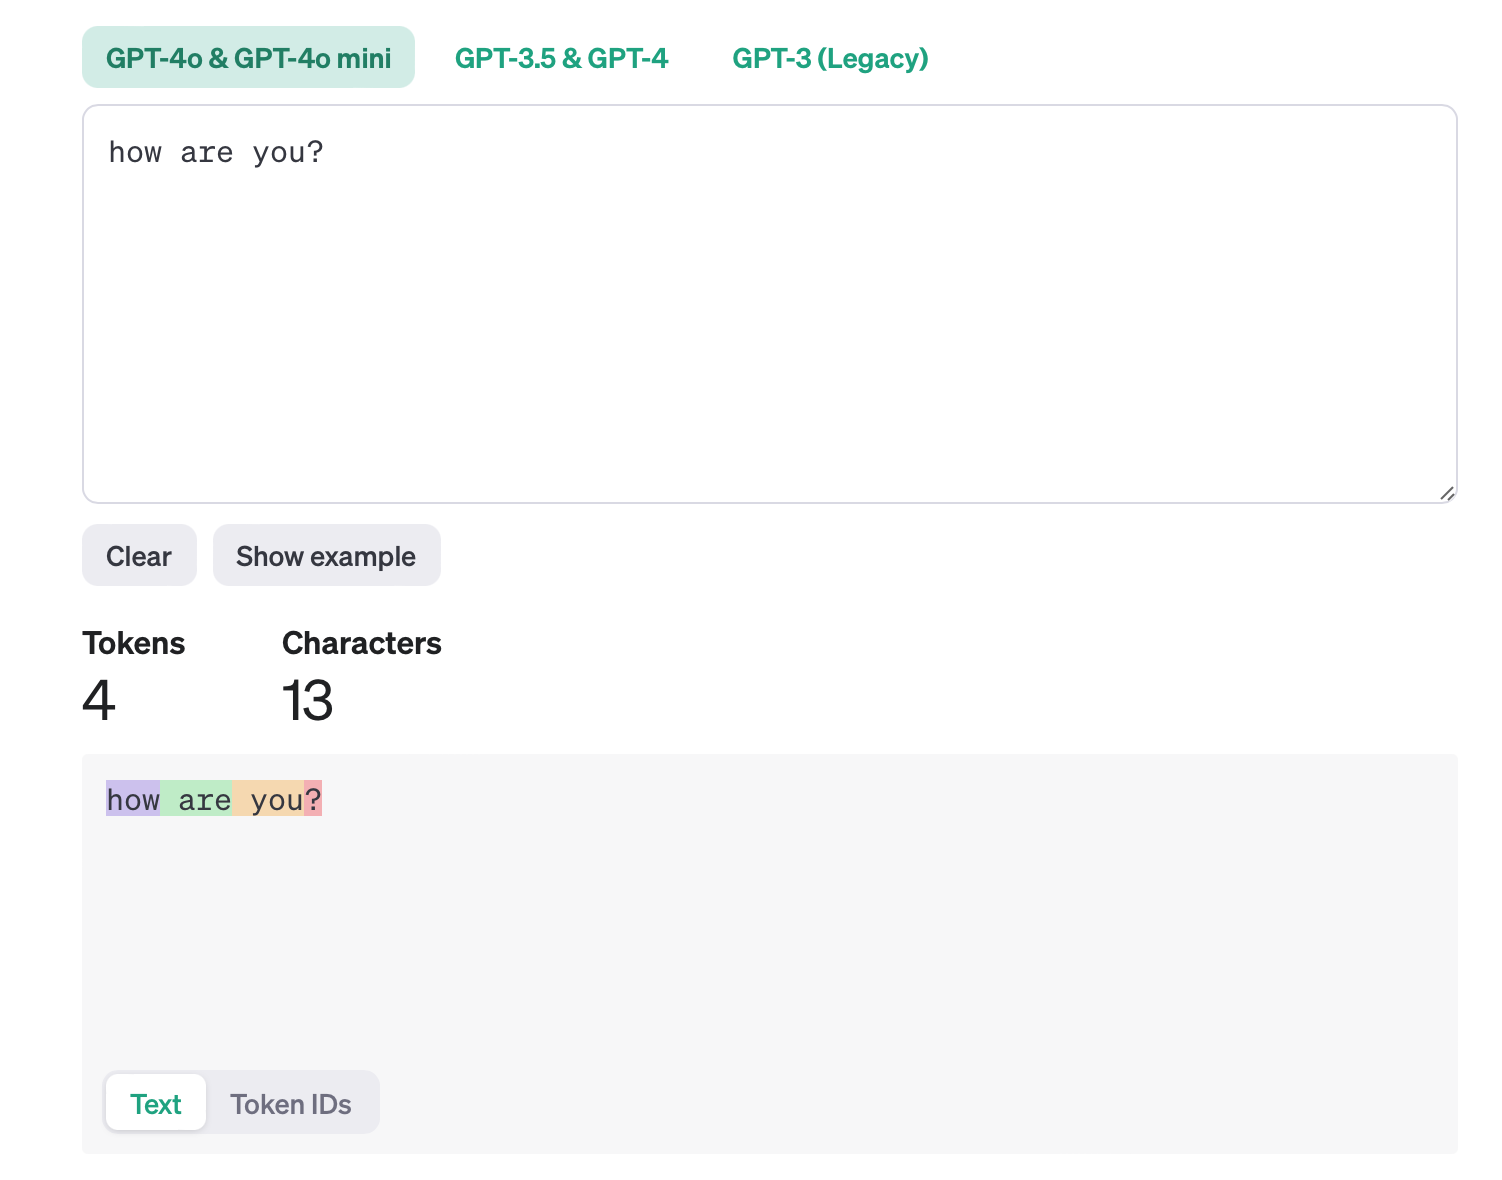

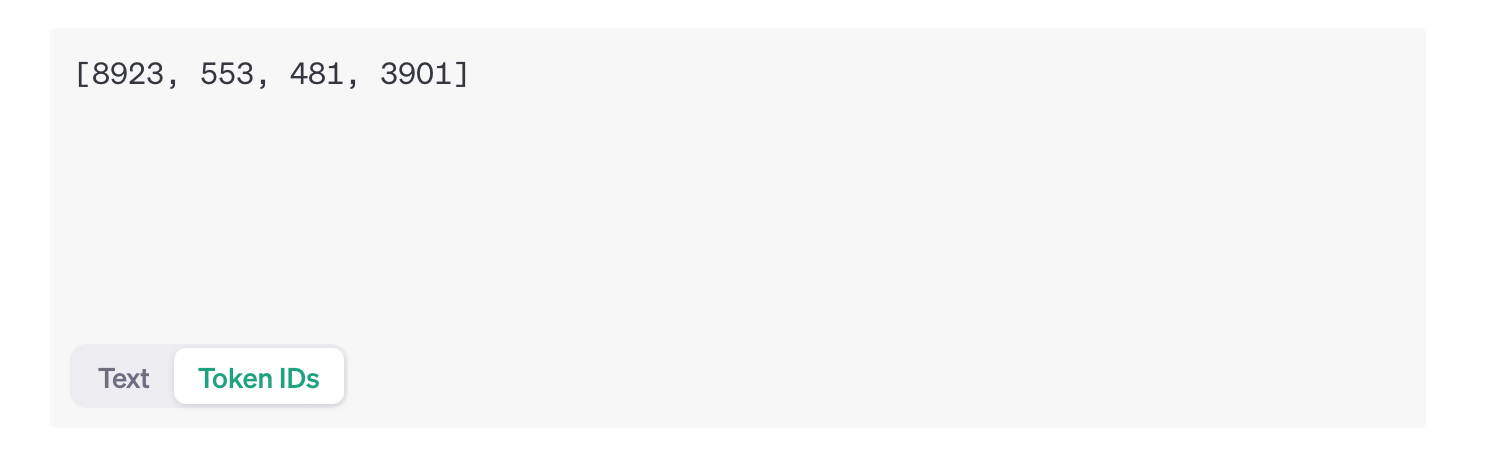

As seen above, the result above matches with the result from tiktoken library, however the count doesnot match with response AIMessage **why?**

As openAI expects the input request be sent with "role" and "content" as dictionary, langchain adds it internally even if we specify the message as plain string. we could check the details by turning on the debug mode  

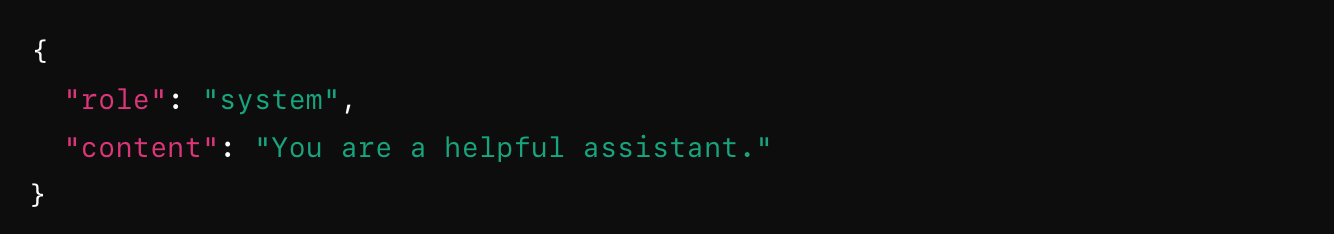

In [83]:
import langchain
langchain.debug=True

In [84]:
llm.invoke("how are you?")

[llm/start] [llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: how are you?"
  ]
}
[llm/end] [llm:ChatOpenAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?",
        "generation_info": {
          "finish_reason": "stop",
          "logprobs": null
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
            "content": "I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?",
            "additional_kwargs": {
              "refusal": null
            },
            "response_metadata": {
              "token_usage": {
             

AIMessage(content="I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 11, 'total_tokens': 39, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-3c13fd44-f494-4779-940d-8d9514ac9827-0', usage_metadata={'input_tokens': 11, 'output_tokens': 28, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

Now lets check what is the token count after putting it in proper format

In [66]:
encoding.encode('{role:user,content:how are you?}')

[90, 8716, 114851, 11, 3252, 25, 8923, 553, 481, 30, 92]

And what is the content token length? It matches!

In [85]:
len(encoding.encode(aimessage.content))

28